# This Notebook uses RSEM coutns

In [46]:
library(repr)
options(repr.plot.width=7, repr.plot.height=6, repr.plot.res=180)

In [2]:
library(dplyr)
library(tidyverse)
library(WriteXLS)
library(stringr)

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ stringr 1.4.0
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
library(DESeq2)
library(apeglm)
library(EnhancedVolcano)
library(ggplot2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply

In [4]:
quadroot <- function (x) { # function to help decrease range of read counts. Easier for heatmap visulization
    return(x^(1/4))
}

In [5]:
library(pheatmap)

In [6]:
setwd('/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/')

In [7]:
list.files('.', c('csv'))

[1] "all_chip_targets.csv"                                     
 [2] "conditions_group1.csv"                                    
 [3] "conditions_group2.csv"                                    
 [4] "conditions_group3.csv"                                    
 [5] "Day4_WT_vs_ZBTB18_KO_sigGenes.csv"                        
 [6] "EnRegulator_screen.csv"                                   
 [7] "ES_WT_vs_ZBTB18_KO_Sig_Genes.csv"                         
 [8] "expressionBySample_CBC.csv"                               
 [9] "expressionBySample_DFC.csv"                               
[10] "expressionBySample_S1C.csv"                               
[11] "expressionBySample_STR.csv"                               
[12] "FoldChangeByTimePoints.csv"                               
[13] "gencode_refseq_partial_modified_geneNames_ID_20191230.csv"
[14] "gencode_refseq_partial_modified_geneNames_ID.csv"         
[15] "HitGeneCount.csv"                                         
[16] "HitGeneCountMM.csv"                                       
[17] "Hitlist_20191230.csv"                                     
[18] "HS_td-VStd+_td-VSdox120.csv"                              
[19] "interaction_matrix_nofilter_20200104_explained.csv"       
[20] "Interaction_matrix_nofilter_AllTF_20200107.csv"           
[21] "Interactions_ATAC_rawCounts_AllTF_20200108.csv"           
[22] "intersection_output.csv"                                  
[23] "Mouse ESC screen.csv"                                     
[24] "NGN_started_network_20200107_node.csv"                    
[25] "NGN_started_network_20200107.csv"                         
[26] "NGN2_motif_targets.csv"                                   
[27] "plot_screen_data_sqrt.csv"                                
[28] "plot_screen_data.csv"                                     
[29] "plot_screenMM_data.csv"                                   
[30] "ProteinCodingGeneID_GeneName_Lookup_20191230.csv"         
[31] "ProteinGeneList_20191230.csv"                             
[32] "RCmNorRatioLog2.lu.csv"                                   
[33] "Refseq_to_Gencode_genenames.csv"                          
[34] "rna-seq_wt_timepoints_padj_l2fc_signft_genes.csv"         
[35] "RNAseq_WT_temporal.csv"                                   
[36] "RNASeqSampleNames.csv"                                    
[37] "rsem_counts_B1B2_combined.csv"                            
[38] "Significant_genes_DOXvsES.csv"                            
[39] "Significant_genes_WTvsZBTB18KO.csv"                       
[40] "TF_motif_gene_clusters.csv"                               
[41] "TF_Screen_FC_Pval_15HvsES.csv"                            
[42] "TF_Screen_FC_Pval_1DvsES.csv"                             
[43] "TF_Screen_FC_Pval_2DvsES.csv"                             
[44] "TF_Screen_FC_Pval_4DvsES.csv"                             
[45] "TF_Screen_FC_Pval_7DvsES.csv"                             
[46] "TF_ScreenSelectedNormalizedCounts.csv"                    
[47] "tf.heatmap.genes.csv"                                     
[48] "tf.heatmap.genes.down.csv"                                
[49] "tf.heatmap.genes.up.csv"                                  
[50] "TFlist_20191118.csv"                                      
[51] "TFlist_20191230.csv"

In [8]:
cnts <- read.csv(file = 'rsem_counts_B1B2_combined.csv', stringsAsFactors = F)

In [9]:
# remove some gene_ids
remove_gene_ids <- read_table("RNAseq_remove_gene_id_list.txt", col_names = F) %>% pull(X1)
cnts <- filter(cnts, !gene_id %in% remove_gene_ids)


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  X1 = col_character()
)




In [10]:
cnts %>% head
cnts %>% dim

,gene_id,gene_name,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000000003.14,TSPAN6,817.0001,966.0001,789.0001,1226.0001,757.0001,723.0001,991.0001,1400.0001,⋯,1262.0001,2215.0001,1604.0001,2076.0001,1064.0001,2301.0001,175.0001,457.0001,294.0001,584.0001
2,ENSG00000000005.6,TNMD,19.0001,0.0001,0.0001,11.0001,11.0001,14.0001,1.0001,11.0001,⋯,0.0001,2.0001,0.0001,0.0001,0.0001,1.0001,0.0001,0.0001,0.0001,0.0001
3,ENSG00000000419.12,DPM1,762.0001,731.0001,746.0001,908.0001,809.0001,644.0001,516.0001,1264.0001,⋯,853.0001,901.0001,797.0001,791.0001,345.0001,1147.0001,378.0001,400.0001,255.0001,567.0001
4,ENSG00000000457.14,SCYL3,20.5201,67.4201,49.0501,70.2001,28.5701,27.2601,56.7901,14.3201,⋯,0.0001,58.1201,129.1501,46.1601,82.9401,80.7301,46.0801,31.0001,111.0001,124.8201
5,ENSG00000000460.17,C1orf112,114.4801,211.6401,160.9501,266.8001,153.4301,145.7401,101.2101,253.6701,⋯,146.0001,165.8801,114.8501,187.8401,118.0601,126.2701,54.9201,0.0001,0.0001,1.1801
6,ENSG00000000938.13,FGR,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,⋯,0.0001,0.0001,0.0001,0.0001,0.0001,2.0001,0.0001,0.0001,0.0001,0.0001


[1] 58762    46

In [11]:
cnts[,3:46] <- apply(cnts[,3:46],2, as.integer) # convert rsem floating data to integer

In [12]:
cnts <- cnts %>% column_to_rownames('gene_id') 

# WT compared to ZBTB18KO, sample sheet.

Condition  |  Sample    
:---------:|:-------:
WT.ES  |  1, 2    
108.ES |   3, 4    
112.ES |   5, 6    
WT.Day4  |  7,8    
108.Day4 |   9, 10    
112.Day4 |   11, 12

# Comparison 1: ES WT vs. ES ZBTB18 knockout.

- WT.ES vs. 108.ES
- WT.ES vs. 112.ES

In [14]:
all.sample.annotation <- read.csv('RNASeqSampleNames.csv', stringsAsFactors=F)

In [15]:
all.sample.annotation %>% t

sample,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,S05_B1,S05_B2,⋯,S18_B1,S18_B2,S19_B1,S19_B2,S20_B1,S20_B2,S21_B1,S21_B2,S22_B1,S22_B2
condition,WT.ES,WT.ES,WT.ES,WT.ES,K108.ES,K108.ES,K108.ES,K108.ES,K112.ES,K112.ES,⋯,WT.D1,WT.D1,WT.D2,WT.D2,WT.D2,WT.D2,WT.D7,WT.D7,WT.D7,WT.D7
group,ES,ES,ES,ES,KO.ES,KO.ES,KO.ES,KO.ES,KO.ES,KO.ES,⋯,D1,D1,D2,D2,D2,D2,D7,D7,D7,D7


In [16]:
# sample names for ES: 1,2,3,4,5,6
cols.ES <- all.sample.annotation %>% filter(str_detect(sample, 'S01|02|03|04|05|06.+')) %>% pull(sample)

In [17]:
cols.ES %>% t

S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,S05_B1,S05_B2,S06_B1,S06_B2


In [18]:
cnts.ES <- cnts[,cols.ES] # get relevant counts 

In [19]:
cnts.ES %>% tail

,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,S05_B1,S05_B2,S06_B1,S06_B2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000288106.1,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000288107.1,3,10,0,7,0,0,0,0,0,0,0,17
ENSG00000288108.1,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000288109.1,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000288110.1,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000288111.1,0,0,0,1,8,0,0,0,0,1,0,0


In [20]:
# load gencode annotation lookup
gtf_lookup <- read.csv("gencode_refseq_partial_modified_geneNames_ID_20191230.csv", stringsAsFactors = F, header = T)

In [21]:
# get gene_names
gene_ids.ES <- rownames_to_column(cnts.ES, 'gene_id')[,1:2] # list of gene IDs specific to ES dataset
#gtf_lookup$gene_id <- as.character(gtf_lookup$gene_id)
gene_names.ES <- left_join(gene_ids.ES, gtf_lookup, 'gene_id') %>% pull(gene_name) %>% as.character # join to get gene names

In [22]:
all.sample.annotation %>% str

'data.frame':	44 obs. of  3 variables:
 $ sample   : chr  "S01_B1" "S01_B2" "S02_B1" "S02_B2" ...
 $ condition: chr  "WT.ES" "WT.ES" "WT.ES" "WT.ES" ...
 $ group    : chr  "ES" "ES" "ES" "ES" ...


In [23]:
coldata.ES <- all.sample.annotation %>% filter(str_detect(sample, 'S01|02|03|04|05|06.+')) %>% 
        select(condition, group)

In [24]:
coldata.ES %>% t

condition,WT.ES,WT.ES,WT.ES,WT.ES,K108.ES,K108.ES,K108.ES,K108.ES,K112.ES,K112.ES,K112.ES,K112.ES
group,ES,ES,ES,ES,KO.ES,KO.ES,KO.ES,KO.ES,KO.ES,KO.ES,KO.ES,KO.ES


In [25]:
dds.ES <- DESeqDataSetFromMatrix(countData = cnts.ES, colData = coldata.ES, design = ~ group)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [26]:
all(rownames(dds.ES) == gene_ids.ES$gene_id) # make sure all gene_ids are the same as the gene ids in dds

[1] TRUE

In [27]:
mcols(dds.ES) <- cbind(mcols(dds.ES), 'gene_name' = gene_names.ES) # adding gene_names to counts dds

In [28]:
keep.ES <- rowSums(counts(dds.ES)) >= 10 # pre-analysis filter to remove very low read count genes
dds.ES <- dds.ES[keep.ES,]

In [29]:
dim(dds.ES)

[1] 25221    12

In [30]:
counts(dds.ES) %>% head()

,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,S05_B1,S05_B2,S06_B1,S06_B2
ENSG00000000003.14,817,966,789,1226,757,723,991,1400,1194,1732,1093,2456
ENSG00000000005.6,19,0,0,11,11,14,1,11,0,14,0,19
ENSG00000000419.12,762,731,746,908,809,644,516,1264,340,1031,597,1772
ENSG00000000457.14,20,67,49,70,28,27,56,14,65,37,40,41
ENSG00000000460.17,114,211,160,266,153,145,101,253,148,271,94,361
ENSG00000001036.13,229,396,190,409,277,140,229,523,313,557,546,691


In [31]:
dds.ES <- DESeq(dds.ES) # fit DESeq mdoel

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 931 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [32]:
res.ES <- results(dds.ES) # modeling WT ES vs. ZBTB18 KO ES

In [41]:
res.ES %>% head

log2 fold change (MLE): group KO.ES vs ES 
Wald test p-value: group KO.ES vs ES 
DataFrame with 6 rows and 6 columns
                           baseMean     log2FoldChange             lfcSE
                          <numeric>          <numeric>         <numeric>
ENSG00000000003.14 1080.51992703824  0.214433753941824 0.136144699507715
ENSG00000000005.6  7.76308377271673 0.0031201749361503  1.37766683822814
ENSG00000000419.12 778.475096987032 -0.102427446429814 0.220059026634851
ENSG00000000457.14 43.0208360632536 -0.468874101812199 0.511074839246993
ENSG00000000460.17 174.841229628706 -0.200270907214335 0.262346727629496
ENSG00000001036.13 342.064054098283  0.186234401741421 0.261096968714484
                                  stat            pvalue              padj
                             <numeric>         <numeric>         <numeric>
ENSG00000000003.14    1.57504298527371 0.115246522895922  0.76864441471354
ENSG00000000005.6  0.00226482546401658 0.998192932274221 0.999576117283545

#### Log fold change shrinkage LFC for visulaization and ranking (for easier/cleaner visulization)

In [34]:
resultsNames(dds.ES)

[1] "Intercept"         "group_KO.ES_vs_ES"

In [35]:
resLFC.ES <- lfcShrink(dds.ES, coef='group_KO.ES_vs_ES', type='apeglm')

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



### MA-plot

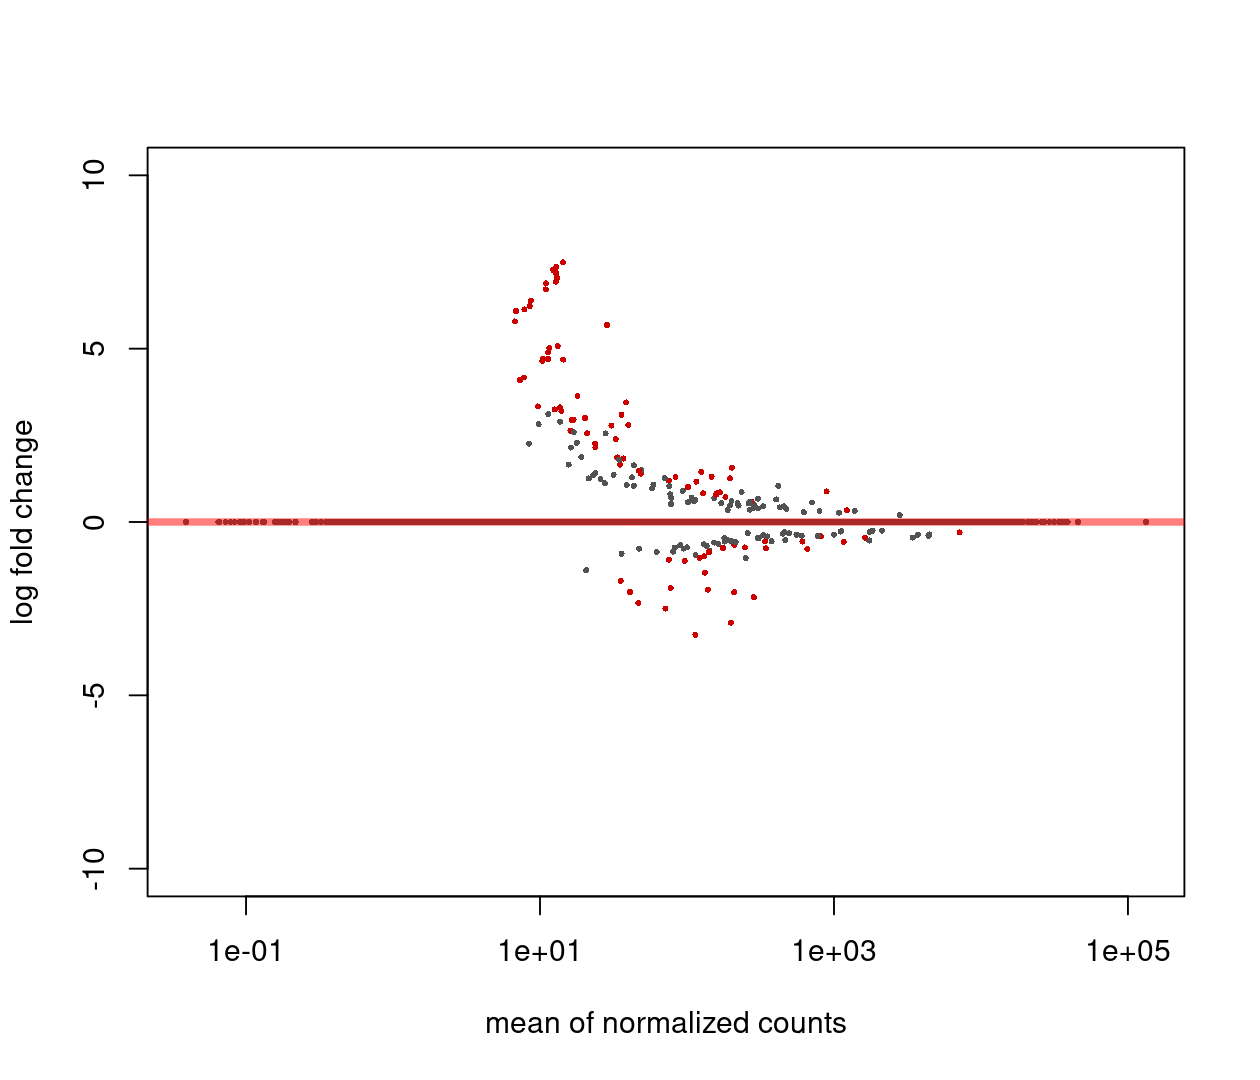

In [47]:
plotMA(resLFC.ES, ylim=c(-10,10))
#idx <- identify(res1$baseMean, res$log2FoldChange)
#rownames(res)[idx]

Number of hit genes given `FDR`

In [60]:
fdr.ES <- 0.05
FC.ES = 1 # added on 4/21/2021

In [71]:
hitlist <- read_csv("Hitlist_20191230.csv") %>% pull(hgnc_symbol)


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  gene_name = col_character(),
  hgnc_symbol = col_character()
)




In [49]:
sum(res.ES$padj < fdr.ES, na.rm=T)

[1] 72

In [50]:
# get significant genes by removing NA values, and select for padj < FDR, this is used to get the gene IDs
# which then used to get normalized counts for heatmap purposes
sigID.ES <- res.ES[!is.na(res.ES$padj) & res.ES$padj < fdr.ES,] %>% as.data.frame %>% rownames_to_column('gene_id')  

In [51]:
sigID.ES %>% str

'data.frame':	72 obs. of  7 variables:
 $ gene_id       : chr  "ENSG00000026025.16" "ENSG00000065615.14" "ENSG00000066923.17" "ENSG00000070669.17" ...
 $ baseMean      : num  1166.9 83.5 14.4 890 10.1 ...
 $ log2FoldChange: num  -0.687 1.479 5.338 1.01 6.305 ...
 $ lfcSE         : num  0.179 0.344 1.251 0.239 1.656 ...
 $ stat          : num  -3.83 4.3 4.27 4.23 3.81 ...
 $ pvalue        : num  1.27e-04 1.68e-05 1.97e-05 2.36e-05 1.40e-04 ...
 $ padj          : num  0.0396 0.0101 0.0115 0.0123 0.041 ...


In [52]:
# get the normalized counts of all genes, also add gene name in this step
# this is later joined with the list significant genes
sigGenes.ES <- counts(dds.ES, normalized=T) %>% as.data.frame %>% 
                add_column(.before=1,'gene'=mcols(dds.ES)$gene_name) %>% rownames_to_column('gene_id')# add gene_name

In [53]:
# using 'gene_id' and the previous DESeq2 results, get significant genes, and their normalized counts, and padj
sigGenes.ES <- left_join(sigID.ES[,c('gene_id','padj', 'log2FoldChange')], sigGenes.ES, by = 'gene_id') %>%
               arrange(padj)

In [54]:
sigGenes.ES %>% tail
sigGenes.ES %>% dim

,gene_id,padj,log2FoldChange,gene,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,S05_B1,S05_B2,S06_B1,S06_B2
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
67,ENSG00000135472.9,0.04156042,5.6047522,FAIM2,0.0000,1.087855,0.000000,0.000000,5.852291,43.390351,26.411836,0.7875296,3.991851,26.45653,1.02836,15.459204
68,ENSG00000242294.6,0.04185726,3.8756587,STAG3L5P,0.0000,0.000000,2.195369,2.616594,8.193207,18.195954,5.030826,25.9884771,13.971480,26.45653,40.10606,8.432293
69,ENSG00000187094.11,0.04441701,3.5428048,CCK,0.0000,0.000000,0.000000,7.849781,11.704581,12.597199,21.381010,47.2517765,39.918514,24.90026,23.65229,13.585361
70,ENSG00000268713.1,0.04484919,6.5652906,AC005261.4,0.0000,0.000000,0.000000,0.000000,0.000000,12.597199,17.607891,36.2263620,59.877771,18.67520,0.00000,0.000000
71,ENSG00000087088.20,0.04914042,-0.9888258,BAX,209.2695,329.620195,317.230827,268.636957,119.386728,146.967319,149.667070,166.1687473,179.633313,196.08958,86.38228,89.944458
72,ENSG00000248027.1,0.04946582,5.7277773,AP001351.1,0.0000,0.000000,0.000000,0.000000,11.704581,8.398133,3.773119,16.5381218,0.000000,19.45333,16.45377,4.684607


[1] 72 16

In [55]:
sigGenes.ES <- sigGenes.ES[,c(1,4,2,3,5:16)] # rearrange order of columns

In [56]:
# find genes with more than 1 gene ID
multi_id_genes.ES <- sigGenes.ES %>% group_by(gene, add=F) %>% summarise(n_geneIDs=n_distinct(gene_id)) %>% filter(n_geneIDs > 1)
multi_id_genes.ES <- multi_id_genes.ES$gene

Warning message:
“The `add` argument of `group_by()` is deprecated as of dplyr 1.0.0.
Please use the `.add` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [57]:
multi_id_genes.ES

character(0)

In [58]:
multi_id_genes.ES.remove <- c()

In [ ]:
mutate()

Significant genes, export to csv

In [61]:
sigGenes.ES <- sigGenes.ES %>% mutate(expression=case_when(padj < fdr.ES & log2FoldChange > FC.ES ~ 'Up', 
                                  padj < fdr.ES & log2FoldChange < -FC.ES ~ 'Down',
                                  padj < fdr.ES & log2FoldChange >= -FC.ES & log2FoldChange <= FC.ES ~ 'No Change',
                                  padj >= fdr.ES ~ 'No Change')) %>% arrange(expression, padj) 
 

In [77]:
sigGenes.ES %>% write.table('ES_WT_vs_ZBTB18_KO_Sig_Genes.csv', quote=F, sep=',', row.names = F)

In [62]:
sigGenes.ES %>% str

'data.frame':	72 obs. of  17 variables:
 $ gene_id       : chr  "ENSG00000125144.13" "ENSG00000261780.3" "ENSG00000198417.7" "ENSG00000169715.14" ...
 $ gene          : chr  "MT1G" "LINC02582" "MT1F" "MT1E" ...
 $ padj          : num  5.66e-22 1.26e-19 1.83e-08 2.37e-08 5.87e-07 ...
 $ log2FoldChange: num  -2.96 -3.32 -2.27 -2.04 -2.13 ...
 $ S01_B1        : num  711 217 786 349 554 ...
 $ S01_B2        : num  437 325 411 199 288 ...
 $ S02_B1        : num  342 269 706 310 524 ...
 $ S02_B2        : num  407 330 508 263 363 ...
 $ S03_B1        : num  64.4 30.4 79.6 44.5 55 ...
 $ S03_B2        : num  58.8 39.2 144.2 51.8 44.8 ...
 $ S04_B1        : num  62.9 30.2 111.9 85.5 64.1 ...
 $ S04_B2        : num  43.3 10.2 99.2 52.8 100 ...
 $ S05_B1        : num  85.8 35.9 260.5 71.9 171.6 ...
 $ S05_B2        : num  31.9 35.8 75.5 42 87.2 ...
 $ S06_B1        : num  74 15.4 166.6 104.9 169.7 ...
 $ S06_B2        : num  67.5 31.9 66.1 89 92.8 ...
 $ expression    : chr  "Down" "Down" "Down"

### Heatmap

In [63]:
#### Most significant (WT vs ZBTB18) ranked by padj
most_sig.heatmap.ES <- sigGenes.ES %>% filter(!(gene_id %in% multi_id_genes.ES.remove)) %>% select(-gene_id) %>%
                        top_n(-73, padj) %>% column_to_rownames('gene')

In [64]:
ano.ES = colData(dds.ES) %>% as.data.frame %>% select(condition,group)

### Top 50 of most significant genes (FDR 0.05, WT vs. ZBTB18, ES)

In [65]:
most_sig.heatmap.ES %>% head

,padj,log2FoldChange,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,S05_B1,S05_B2,S06_B1,S06_B2,expression
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
MT1G,5.662992e-22,-2.960793,711.06636,437.317883,342.47757,407.31642,64.37520,58.78693,62.88532,43.31413,85.82480,31.90346,74.04195,67.45834,Down
LINC02582,1.257217e-19,-3.323360,217.14526,325.268773,268.93271,329.69081,30.43191,39.19129,30.18496,10.23788,35.92666,35.79413,15.42541,31.85533,Down
MT1F,1.831321e-08,-2.268238,786.44839,411.209352,705.81115,507.61918,79.59115,144.16794,111.93588,99.22873,260.46830,75.47893,166.59439,66.05296,Down
MT1E,2.365814e-08,-2.043553,348.78255,199.077544,309.54704,262.53157,44.47741,51.78848,85.52404,52.76448,71.85333,42.01920,104.89277,89.00754,Down
MT1H,5.871419e-07,-2.134272,553.55166,288.281689,523.59552,362.83433,55.01153,44.79004,64.14303,100.01626,171.64961,87.15092,169.67947,92.75522,Down
LRRC61,1.201514e-04,-7.285314,47.25441,4.351422,31.83285,24.42154,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,Down


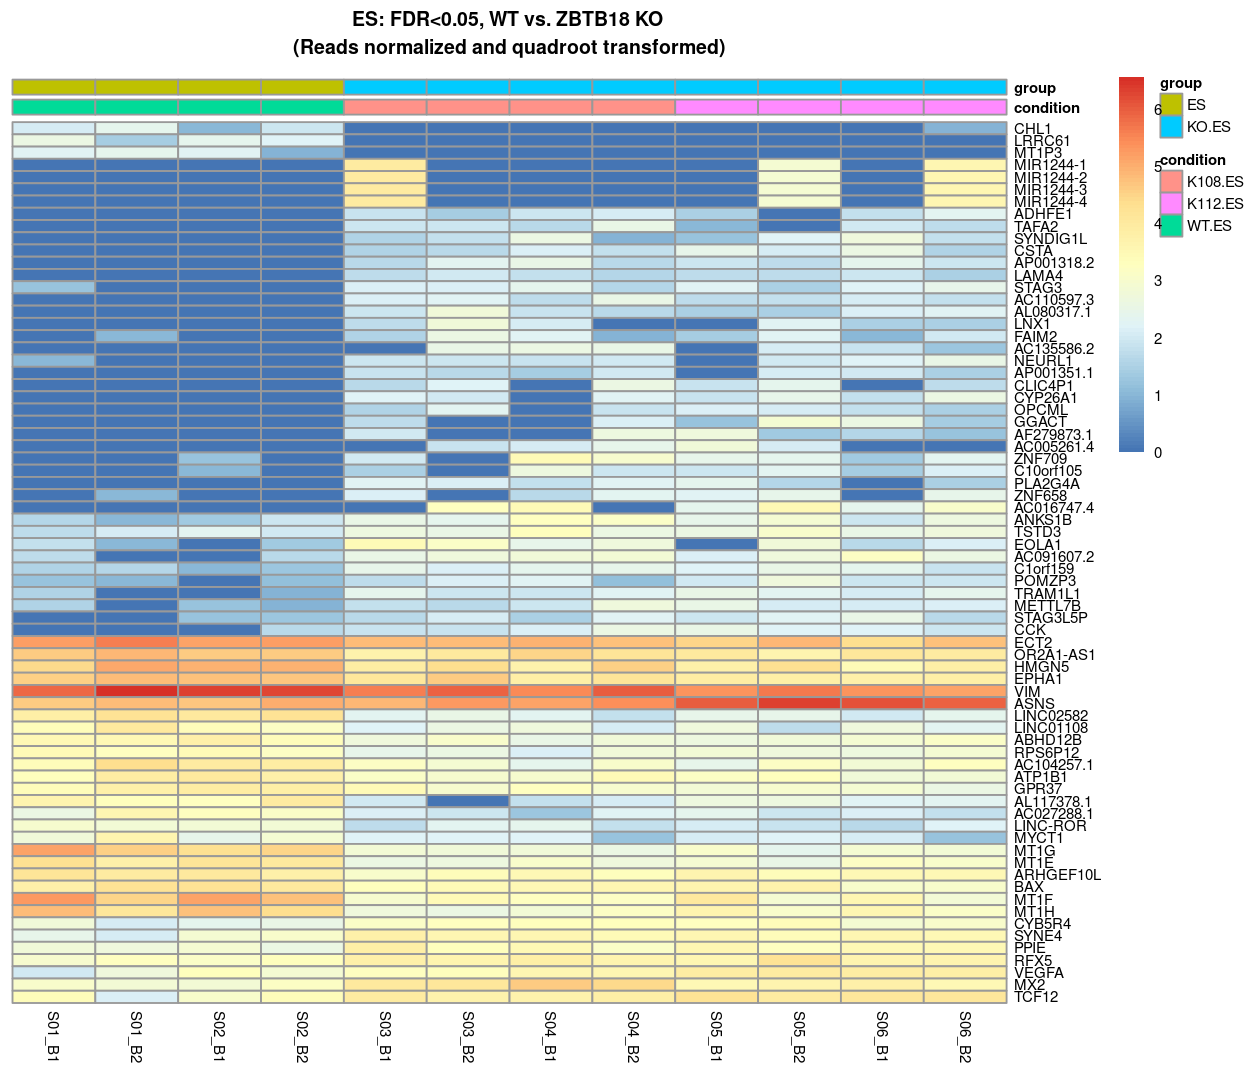

In [66]:
# quadroot transformed normalized reads because read range is large
most_sig.heatmap.ES %>% select(S01_B1:S06_B2) %>% as.matrix %>% apply(2,quadroot) %>%
        pheatmap(cluster_rows=T,show_rownames=T, treeheight_row = 0, cluster_cols=F, annotation_col = ano.ES, 
                 fontsize = 6, main="ES: FDR<0.05, WT vs. ZBTB18 KO \n(Reads normalized and quadroot transformed)")

#### volcano plot

In [68]:
ES.vol <- res.ES %>% as.data.frame %>% rownames_to_column('gene_id') %>% add_column(.before=1,'gene'=mcols(dds.ES)$gene_name)

In [72]:
ES.vol.hits <- filter(ES.vol, gene %in% hitlist)

Warning message in EnhancedVolcano(ES.vol, lab = ES.vol$gene, x = "log2FoldChange", :
“transcriptPointSize argument deprecated in v1.4 - please use pointSize”
Warning message in EnhancedVolcano(ES.vol, lab = ES.vol$gene, x = "log2FoldChange", :
“transcriptLabSize argument deprecated in v1.4 - please use labSize”


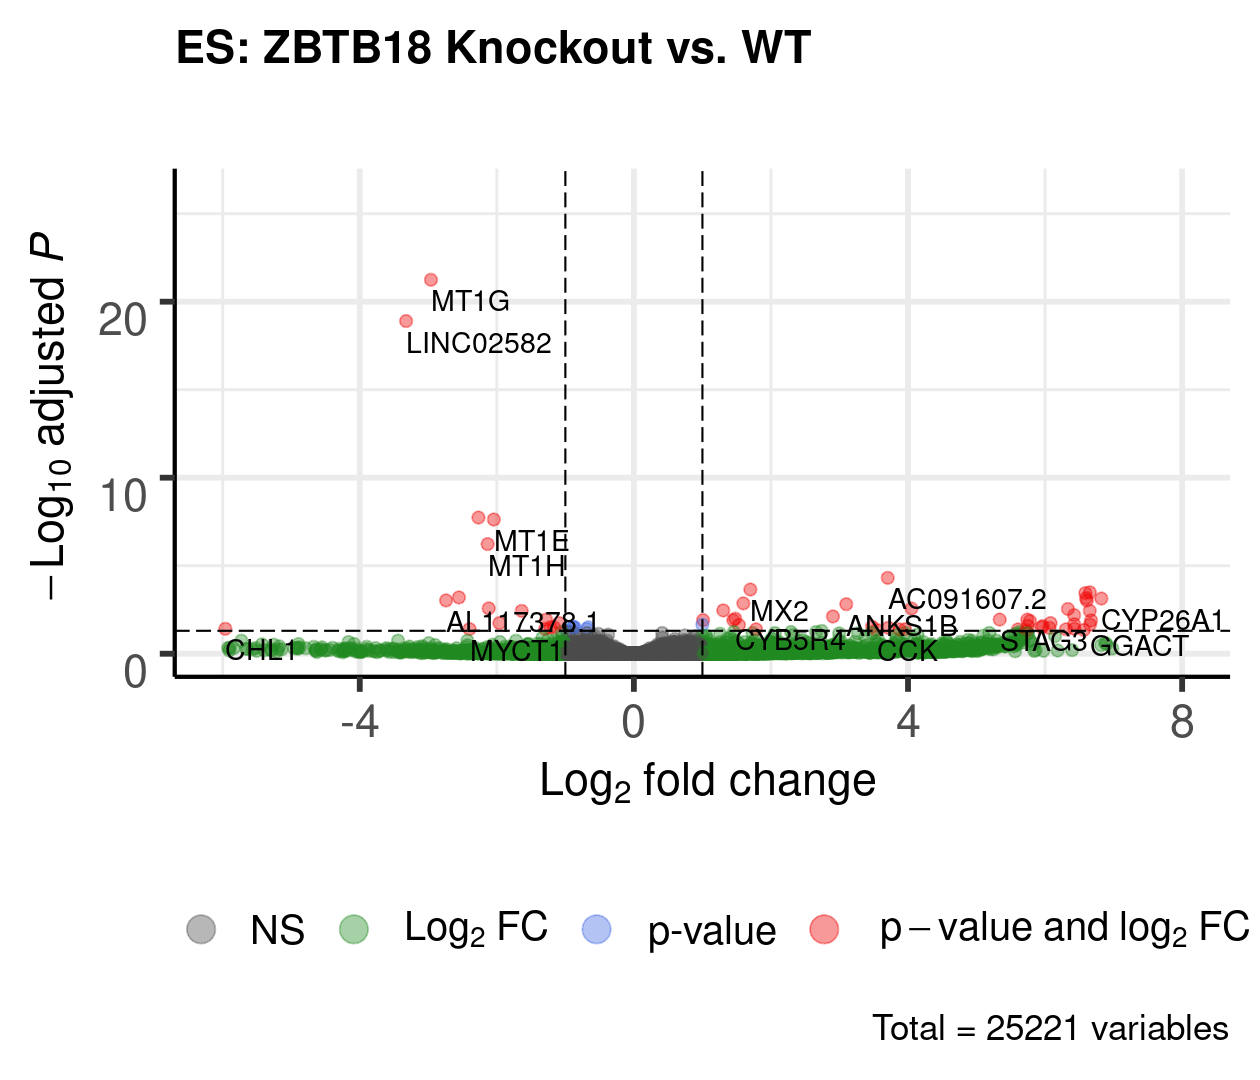

In [74]:
EnhancedVolcano(ES.vol, lab = ES.vol$gene, x='log2FoldChange',y='padj', xlim=c(-6,8),
                xlab = bquote(~Log[2]~ 'fold change'), ylab= bquote(~-Log[10]~adjusted~italic(P)),
                legend=c('NS', 'Log2 FC', 'Adjusted p-value'), legendPosition='bottom', legendLabSize = 16, 
                legendIconSize = 5.0, title = "ES: ZBTB18 Knockout vs. WT", subtitle="",
                pCutoff = fdr.ES, FCcutoff = 1,
                transcriptPointSize = 2, transcriptLabSize = 4.0, colAlpha = .4)
# selectLab = c('FHL3', 'STRAG') to only label key transcripts
ggsave("/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/neville_pdf/fig4_F_zb18ko_vs_wt_ES.pdf", 
       width = 11, height = 8, unit="in")

Warning message in EnhancedVolcano(ES.vol.hits, lab = ES.vol.hits$gene, x = "log2FoldChange", :
“transcriptPointSize argument deprecated in v1.4 - please use pointSize”
Warning message in EnhancedVolcano(ES.vol.hits, lab = ES.vol.hits$gene, x = "log2FoldChange", :
“transcriptLabSize argument deprecated in v1.4 - please use labSize”


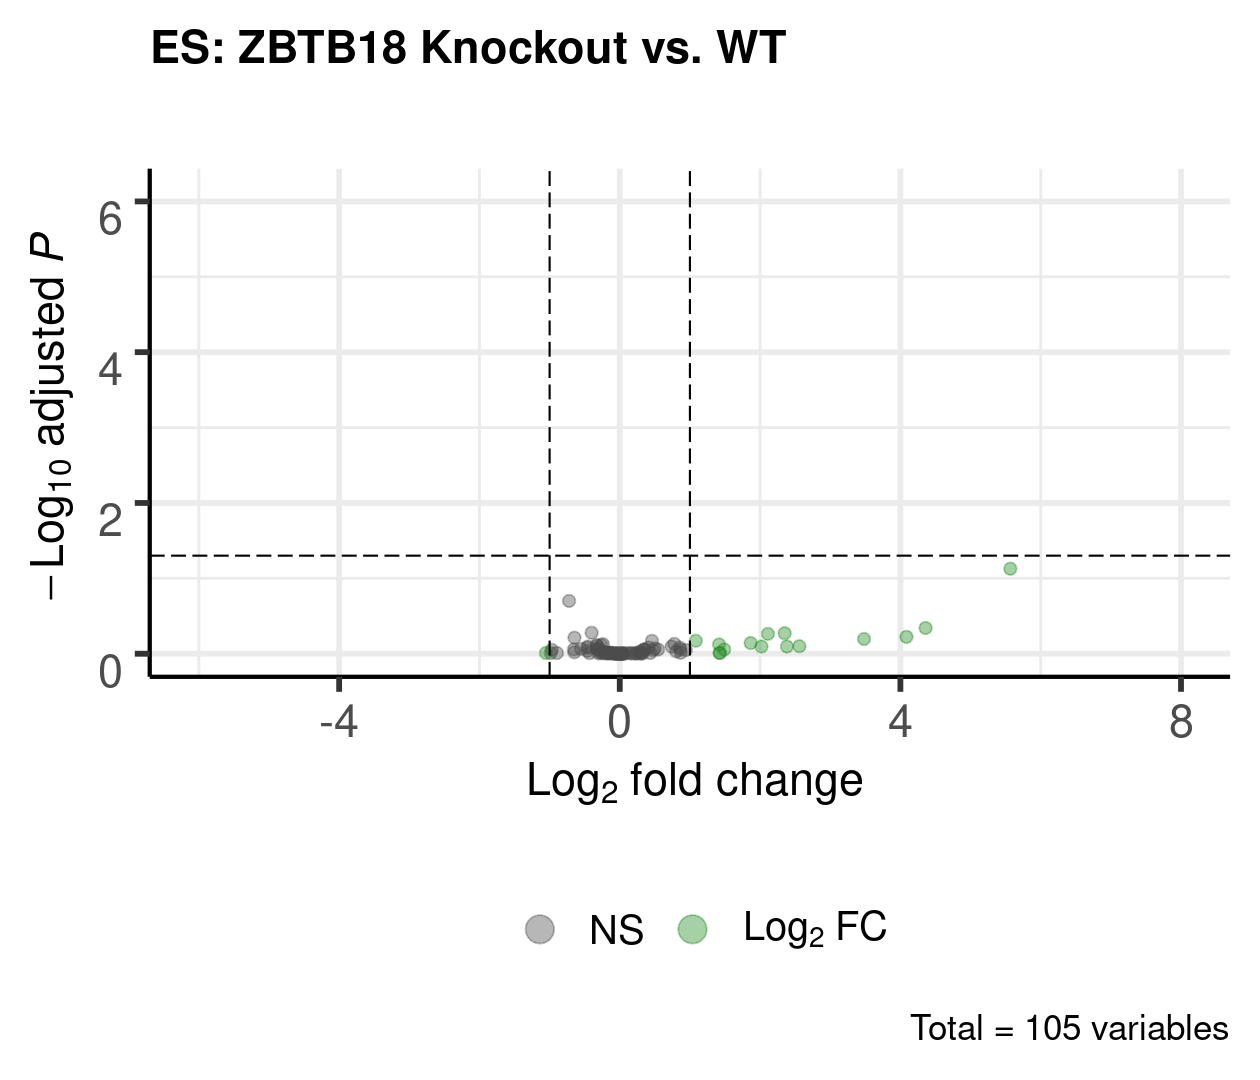

In [75]:
EnhancedVolcano(ES.vol.hits, lab = ES.vol.hits$gene, x='log2FoldChange',y='padj', xlim=c(-6,8),
                xlab = bquote(~Log[2]~ 'fold change'), ylab= bquote(~-Log[10]~adjusted~italic(P)),
                legend=c('NS', 'Log2 FC', 'Adjusted p-value'), legendPosition='bottom', legendLabSize = 16, 
                legendIconSize = 5.0, title = "ES: ZBTB18 Knockout vs. WT", subtitle="",
                pCutoff = fdr.ES, FCcutoff = 1,
                transcriptPointSize = 2, transcriptLabSize = 4.0, colAlpha = .4)
# selectLab = c('FHL3', 'STRAG') to only label key transcripts
ggsave("/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/neville_pdf/fig4_F_zb18ko_vs_wt_ES_hitsonly.pdf", 
       width = 11, height = 8, unit="in")

# Comparison 2: Day 4 WT vs. ZBTB18 Kockout.

- WT.Day4 vs. 108.Day4
- WT.Day4 vs. 112.Day4

Condition  |  Sample    
:---------:|:-------:   
WT.Day4  |  7,8    
108.Day4 |   9, 10    
112.Day4 |   11, 12

In [76]:
# sample names for ES: 7,8,9,10,11,12
cols.D4 <- all.sample.annotation %>% filter(str_detect(sample, 'S07|08|09|10|11|12.+')) %>% pull(sample)
cnts.D4 <- cnts[,cols.D4] # get relevant counts

In [77]:
cnts.D4 %>% tail

,S07_B1,S07_B2,S08_B1,S08_B2,S09_B1,S09_B2,S10_B1,S10_B2,S11_B1,S11_B2,S12_B1,S12_B2
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000288106.1,0,0,0,1,0,7,0,0,0,0,0,0
ENSG00000288107.1,0,0,1,2,2,1,0,0,1,3,1,0
ENSG00000288108.1,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000288109.1,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000288110.1,0,0,0,0,0,0,0,0,0,0,0,0
ENSG00000288111.1,0,0,3,1,5,13,3,0,3,10,5,4


In [78]:
# get gene_names
gene_ids.D4 = rownames_to_column(cnts.D4, 'gene_id')[,1:2] # list of gene IDs specific to ES dataset
#gtf_lookup$gene_id <- as.character(gtf_lookup$gene_id)
gene_names.D4 = left_join(gene_ids.D4, gtf_lookup, 'gene_id') %>% pull(gene_name) %>% as.character # join to get gene names

In [79]:
coldata.D4 <- all.sample.annotation %>% filter(str_detect(sample, 'S07|08|09|10|11|12.+')) %>% 
        select(condition, group)

In [80]:
coldata.D4 %>% t

condition,WT.D4,WT.D4,WT.D4,WT.D4,K108.D4,K108.D4,K108.D4,K108.D4,K112.D4,K112.D4,K112.D4,K112.D4
group,D4,D4,D4,D4,KO.D4,KO.D4,KO.D4,KO.D4,KO.D4,KO.D4,KO.D4,KO.D4


In [81]:
dds.D4 <- DESeqDataSetFromMatrix(countData = cnts.D4, colData = coldata.D4, design = ~ group) 

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [82]:
all(rownames(dds.D4) == gene_ids.D4$gene_id) # make sure all gene_ids are the same as the gene ids in dds

[1] TRUE

In [83]:
mcols(dds.D4) <- cbind(mcols(dds.D4), 'gene_name' = gene_names.D4) # adding gene_names to counts dds

In [84]:
keep.D4 <- rowSums(counts(dds.D4)) >= 10 # pre-analysis filter to remove very low read count genes
dds.D4 <- dds.D4[keep.D4,]

In [85]:
dim(dds.D4)

[1] 24917    12

In [86]:
counts(dds.D4) %>% head

,S07_B1,S07_B2,S08_B1,S08_B2,S09_B1,S09_B2,S10_B1,S10_B2,S11_B1,S11_B2,S12_B1,S12_B2
ENSG00000000003.14,739,359,998,1247,1311,1344,558,1677,775,1004,1346,2009
ENSG00000000005.6,0,0,0,1,0,0,0,0,10,0,14,1
ENSG00000000419.12,390,235,513,774,515,1046,191,551,407,522,482,1289
ENSG00000000457.14,138,29,168,43,70,71,26,26,73,60,111,119
ENSG00000000460.17,0,14,70,38,107,114,42,16,83,58,51,155
ENSG00000000971.15,0,0,1,0,2,4,0,0,0,10,0,0


In [87]:
dds.D4 <- DESeq(dds.D4) # fit DESeq mdoel

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 882 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [89]:
res.D4 <- results(dds.D4) # modelling WT D4 vs. ZBTB18 KO D4

In [90]:
res.D4 %>% head

log2 fold change (MLE): group KO.D4 vs D4 
Wald test p-value: group KO.D4 vs D4 
DataFrame with 6 rows and 6 columns
                           baseMean     log2FoldChange             lfcSE
                          <numeric>          <numeric>         <numeric>
ENSG00000000003.14 1005.69908295322  0.434624770856034 0.176033378817278
ENSG00000000005.6    2.054300900674   3.20662484839224  2.63342234169639
ENSG00000000419.12 506.195240197822  0.128816242437135 0.237743115545908
ENSG00000000457.14 70.9423318904309 -0.585811075426342 0.431259599317001
ENSG00000000460.17 55.3107078931421   1.27458011247056 0.634225664281664
ENSG00000000971.15 1.18061556884043     2.383469995225  2.95316792925717
                                stat             pvalue              padj
                           <numeric>          <numeric>         <numeric>
ENSG00000000003.14  2.46899067538306 0.0135494749118092 0.136668325685256
ENSG00000000005.6    1.2176644807861  0.223351500010821                NA
ENS

#### Log fold change shrinkage LFC for visulaization and ranking (for easier/cleaner visulization)

In [91]:
resultsNames(dds.D4)

[1] "Intercept"         "group_KO.D4_vs_D4"

In [92]:
resLFC.D4 <- lfcShrink(dds.D4, coef='group_KO.D4_vs_D4', type='apeglm')

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



### MA-plot

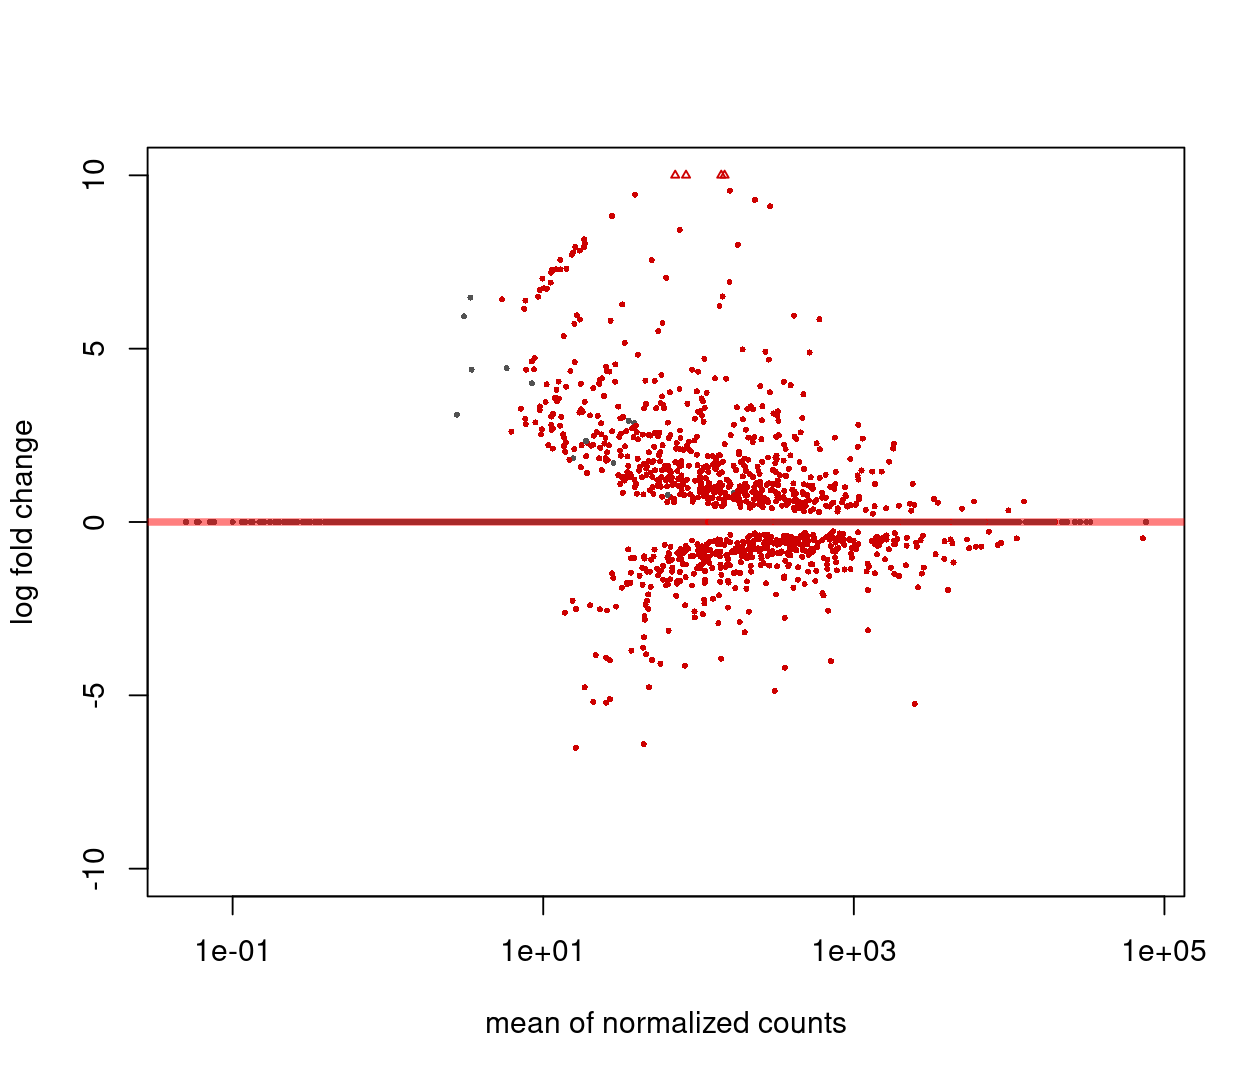

In [93]:
plotMA(resLFC.D4, ylim=c(-10,10))
#idx <- identify(res1$baseMean, res$log2FoldChange)
#rownames(res)[idx]

Number of hit genes given `FDR`

In [94]:
fdr.D4 <- 0.05
FC.D4 <- 1

In [70]:
hitlist <- read_csv("Hitlist_20191230.csv") %>% pull(hgnc_symbol)


── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  gene_name = col_character(),
  hgnc_symbol = col_character()
)




In [95]:
sum(res.D4$padj < fdr.D4, na.rm=T)

[1] 1127

In [96]:
# get significant genes by removing NA values, and select for padj < FDR, this is used to get the gene IDs
# which then used to get normalized counts for heatmap purposes
sigID.D4 <- res.D4[!is.na(res.D4$padj) & res.D4$padj < fdr.D4,] %>% as.data.frame %>% rownames_to_column('gene_id') 

In [97]:
sigID.D4 %>% str

'data.frame':	1127 obs. of  7 variables:
 $ gene_id       : chr  "ENSG00000002586.20" "ENSG00000003096.14" "ENSG00000003147.19" "ENSG00000003436.16" ...
 $ baseMean      : num  283.6 261.5 23.9 65.4 135.6 ...
 $ log2FoldChange: num  1.222 -0.937 -1.599 3.959 0.953 ...
 $ lfcSE         : num  0.243 0.264 0.521 0.619 0.303 ...
 $ stat          : num  5.03 -3.55 -3.07 6.39 3.14 ...
 $ pvalue        : num  4.87e-07 3.79e-04 2.13e-03 1.65e-10 1.67e-03 ...
 $ padj          : num  3.34e-05 9.68e-03 3.74e-02 2.16e-08 3.09e-02 ...


In [98]:
# get the normalized counts of all genes, also add gene name in this step
# this is later joined with the list significant genes
sigGenes.D4 <- counts(dds.D4, normalized=T) %>% as.data.frame %>% 
                add_column(.before=1,'gene'=mcols(dds.D4)$gene_name) %>% rownames_to_column('gene_id')# add gene_name

In [99]:
# using 'gene_id' and the previous DESeq2 results, get significant genes, and their normalized counts, and padj
sigGenes.D4 <- left_join(sigID.D4[,c('gene_id','padj', 'log2FoldChange')], sigGenes.D4, by = 'gene_id') %>%
               arrange(padj)

In [100]:
sigGenes.D4 %>% head
sigGenes.D4 %>% dim

,gene_id,padj,log2FoldChange,gene,S07_B1,S07_B2,S08_B1,S08_B2,S09_B1,S09_B2,S10_B1,S10_B2,S11_B1,S11_B2,S12_B1,S12_B2
,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ENSG00000183386.10,8.167831e-74,5.989195,FHL3,11.86810,15.88127,13.804243,1.376701,642.68835,541.42293,549.43718,522.05124,733.14329,630.5721,687.02286,598.05968
2,ENSG00000137868.19,1.355609e-58,3.971061,STRA6,37.58230,42.35005,39.959650,28.222374,678.58318,542.82923,413.51369,787.19111,586.28695,502.1388,574.94317,468.83070
3,ENSG00000181458.10,7.440923e-44,5.026804,TMEM45A,4.94504,15.88127,5.085774,12.390310,317.07098,345.94816,222.07217,366.62443,234.51478,285.4075,244.69307,251.24517
4,ENSG00000148908.15,3.373251e-42,-3.159893,RGS10,3342.84703,2840.10053,2831.322847,3070.731908,356.38437,411.34080,583.89665,312.68218,225.40741,255.0829,250.68206,318.56445
5,ENSG00000159251.7,1.022889e-41,-4.244338,ACTC1,1115.60102,1011.10755,863.128443,905.869354,52.13296,23.90699,99.54959,38.39957,28.46053,54.4058,41.92294,77.53739
6,ENSG00000166250.12,2.365783e-37,3.033347,CLMP,122.63699,71.46572,63.208901,64.016603,870.87690,705.95925,587.72548,748.79154,557.82642,518.1929,652.80005,620.90015


[1] 1127   16

In [101]:
sigGenes.D4 <- sigGenes.D4[,c(1,4,2,3,5:16)] # rearrange order of columns

In [102]:
# find genes with more than 1 gene ID
multi_id_genes.D4 <- sigGenes.D4 %>% group_by(gene, add=F) %>% summarise(n_geneIDs=n_distinct(gene_id)) %>% filter(n_geneIDs > 1)
multi_id_genes.D4 <- multi_id_genes.D4$gene

In [103]:
multi_id_genes.D4

character(0)

In [104]:
sigGenes.D4 %>% filter(gene %in% c('CD99'))

gene_id,gene,padj,log2FoldChange,S07_B1,S07_B2,S08_B1,S08_B2,S09_B1,S09_B2,S10_B1,S10_B2,S11_B1,S11_B2,S12_B1,S12_B2
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000002586.20,CD99,3.34438e-05,1.221698,131.5381,164.1065,164.9244,142.4886,318.7803,297.431,271.847,532.1083,218.5769,354.0836,365.3285,442.3838


In [105]:
multi_id_genes.D4.remove <- c('ENSG00000002586.20_PAR_Y')

Significant genes, export to csv

In [106]:
sigGenes.D4 <- sigGenes.D4 %>% mutate(expression=case_when(padj < fdr.D4 & log2FoldChange > FC.D4 ~ 'Up', 
                                  padj < fdr.D4 & log2FoldChange < -FC.D4 ~ 'Down',
                                  padj < fdr.D4 & log2FoldChange >= -FC.D4 & log2FoldChange <= FC.D4 ~ 'No Change',
                                  padj >= fdr.D4 ~ 'Not Significant')) %>% arrange(expression, padj) 

In [107]:
sigGenes.D4 %>% filter(gene %in% c( "ZBTB18", "EGR3", "ELK3", "ZNF282", "NEUROG3", "SNAI2",
                                   "TOX4", "SIX5", "ASB1", "VAX2", "CBX4", "ZNF639", "NR1D2")) %>% 
                select(gene, padj, log2FoldChange, expression)

gene,padj,log2FoldChange,expression
<chr>,<dbl>,<dbl>,<chr>
ZBTB18,0.027742586,0.6769496,No Change
SNAI2,0.001027392,1.2147898,Up
EGR3,0.007835629,4.8741851,Up


In [108]:
sigGenes.D4 %>% filter(gene %in% c("NEUROG3", "TOX4", "SIX5", "ASB1", "VAX2", "ZNF250", "CBX4", 
                                   "TSHZ3", "PRDM5", "KLF10")) %>% 
                select(gene, padj, log2FoldChange, expression)

gene,padj,log2FoldChange,expression
<chr>,<dbl>,<dbl>,<chr>
TSHZ3,5.781786e-12,4.998949,Up


In [127]:
sigGenes.D4 %>% write.csv('Day4_WT_vs_ZBTB18_KO_sigGenes.csv', row.names=F, quote=F)

### Heatmap

In [109]:
#### Most significant (WT vs ZBTB18) ranked by padj
most_sig.heatmap.D4 <- sigGenes.D4 %>% filter(!(gene_id %in% multi_id_genes.D4.remove)) %>% select(-gene_id) %>%
                     column_to_rownames('gene')

In [110]:
ano.D4 = colData(dds.D4) %>% as.data.frame %>% select(condition,group)

In [111]:
most_sig.heatmap.D4 %>% head

,padj,log2FoldChange,S07_B1,S07_B2,S08_B1,S08_B2,S09_B1,S09_B2,S10_B1,S10_B2,S11_B1,S11_B2,S12_B1,S12_B2,expression
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
RGS10,3.373251e-42,-3.159893,3342.847,2840.1005,2831.3228,3070.7319,356.38437,411.34080,583.89665,312.682181,225.40741,255.08293,250.68206,318.56445,Down
ACTC1,1.022889e-41,-4.244338,1115.601,1011.1076,863.1284,905.8694,52.13296,23.90699,99.54959,38.399566,28.46053,54.40580,41.92294,77.53739,Down
COTL1,2.367190e-30,-1.912310,5423.720,4899.3719,5789.7900,4169.3394,1368.27666,1085.65845,1583.22142,1574.382211,1430.99553,1052.44006,1210.63181,1478.01884,Down
SIX1,9.666066e-28,-4.941689,863.404,868.1761,714.1879,1033.2142,24.78452,49.92341,80.40544,5.485652,18.21474,24.97315,16.25583,12.62237,Down
NSG1,5.230293e-24,-2.605782,1721.863,1556.3645,1501.0298,1398.7284,340.14623,203.91253,388.62630,264.225586,277.77479,199.78523,241.27079,123.21833,Down
NEFM,1.946035e-22,-2.000476,7373.055,10243.4194,6165.4107,8539.6772,2371.62258,2706.41152,1638.73946,2337.802157,1347.89077,1862.28376,1901.07695,1977.50385,Down


### Top 50 of most significant genes (FDR 0.05, WT vs. ZBTB18, Day 4)

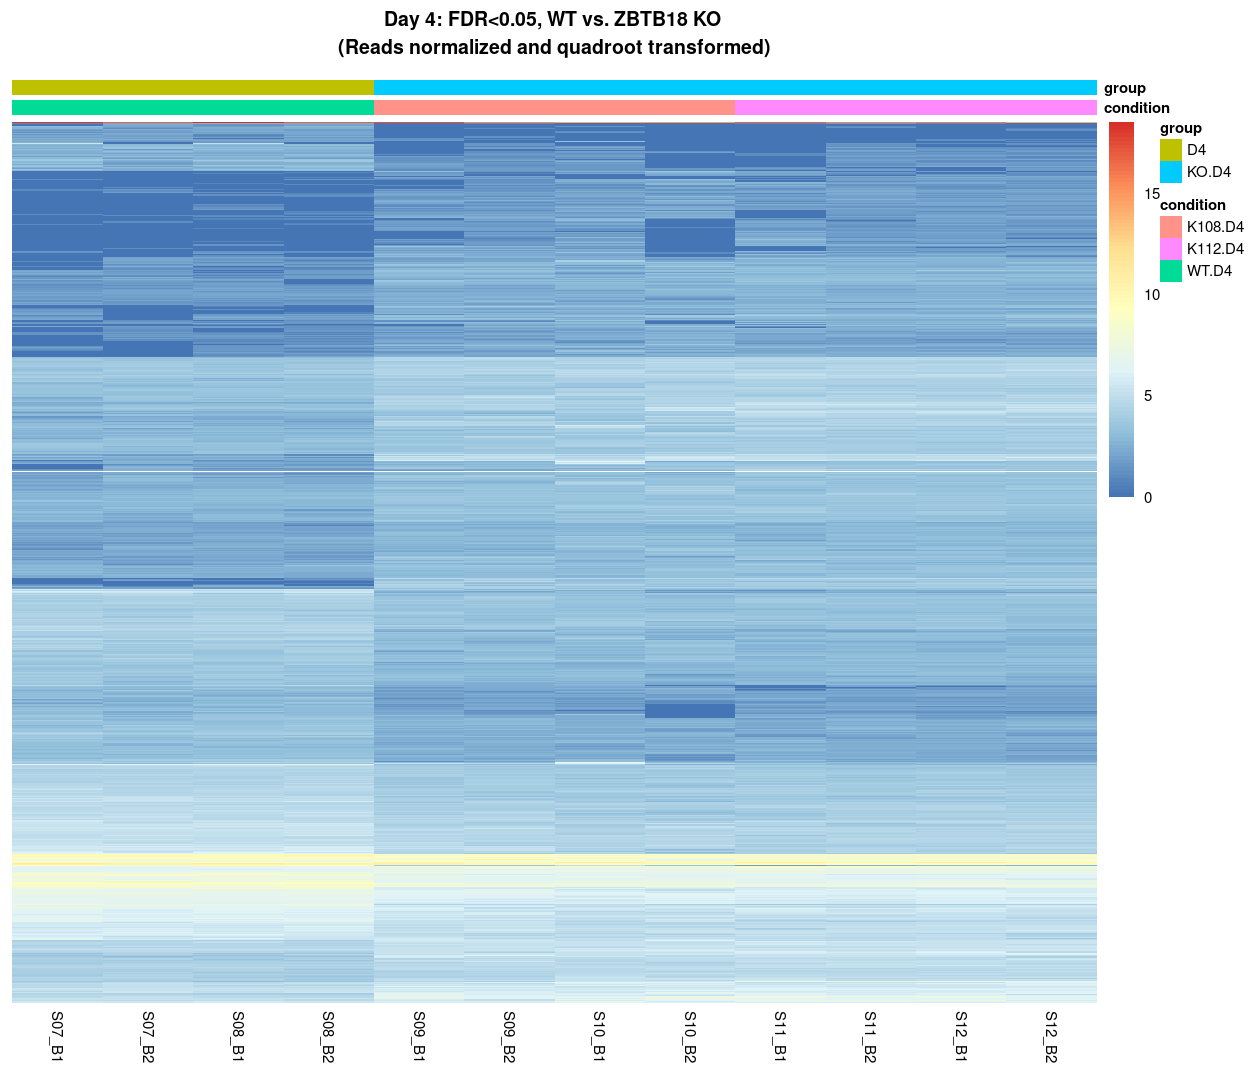

In [112]:
# quadroot transformed normalized reads because read range is large
most_sig.heatmap.D4 %>% select(S07_B1:S12_B2) %>% as.matrix %>% apply(2,quadroot) %>%
        pheatmap(cluster_rows=T,show_rownames=F, treeheight_row = 0, cluster_cols=F, annotation_col = ano.D4, 
                 fontsize = 6, main="Day 4: FDR<0.05, WT vs. ZBTB18 KO \n(Reads normalized and quadroot transformed)")

#### volcano plot

In [113]:
D4.vol <- res.D4 %>% as.data.frame %>% rownames_to_column('gene_id') %>% add_column(.before=1,'gene'=mcols(dds.D4)$gene_name)

In [122]:
head(D4.vol)

,gene,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TSPAN6,ENSG00000000003.14,1005.699083,0.4346248,0.1760334,2.4689907,0.01354947,0.1366683
2,TNMD,ENSG00000000005.6,2.054301,3.2066248,2.6334223,1.2176645,0.22335150,NA
3,DPM1,ENSG00000000419.12,506.195240,0.1288162,0.2377431,0.5418295,0.58793594,0.8962379
4,SCYL3,ENSG00000000457.14,70.942332,-0.5858111,0.4312596,-1.3583723,0.17434559,0.5799439
5,C1orf112,ENSG00000000460.17,55.310708,1.2745801,0.6342257,2.0096634,0.04446682,0.2829908
6,CFH,ENSG00000000971.15,1.180616,2.3834700,2.9531679,0.8070892,0.41961508,NA


In [123]:
write_csv(D4.vol, "/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/neville_pdf/fig4_G_zb18ko_vs_wt_D4_data.csv")

In [114]:
D4.vol.hits <- filter(D4.vol, gene %in% hitlist)

In [124]:
head(D4.vol)

,gene,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,TSPAN6,ENSG00000000003.14,1005.699083,0.4346248,0.1760334,2.4689907,0.01354947,0.1366683
2,TNMD,ENSG00000000005.6,2.054301,3.2066248,2.6334223,1.2176645,0.22335150,NA
3,DPM1,ENSG00000000419.12,506.195240,0.1288162,0.2377431,0.5418295,0.58793594,0.8962379
4,SCYL3,ENSG00000000457.14,70.942332,-0.5858111,0.4312596,-1.3583723,0.17434559,0.5799439
5,C1orf112,ENSG00000000460.17,55.310708,1.2745801,0.6342257,2.0096634,0.04446682,0.2829908
6,CFH,ENSG00000000971.15,1.180616,2.3834700,2.9531679,0.8070892,0.41961508,NA


In [133]:
selectLab = c("FHL3", "STRA6", "SIX1", "ZBTB18")

In [135]:
filter(D4.vol, gene == "ZBTB18")

gene,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZBTB18,ENSG00000179456.10,1107.353,0.6769496,0.2127946,3.181235,0.001466487,0.02774259


Warning message in EnhancedVolcano(D4.vol, lab = D4.vol$gene, selectLab = NULL, :
“transcriptPointSize argument deprecated in v1.4 - please use pointSize”
Warning message in EnhancedVolcano(D4.vol, lab = D4.vol$gene, selectLab = NULL, :
“transcriptLabSize argument deprecated in v1.4 - please use labSize”


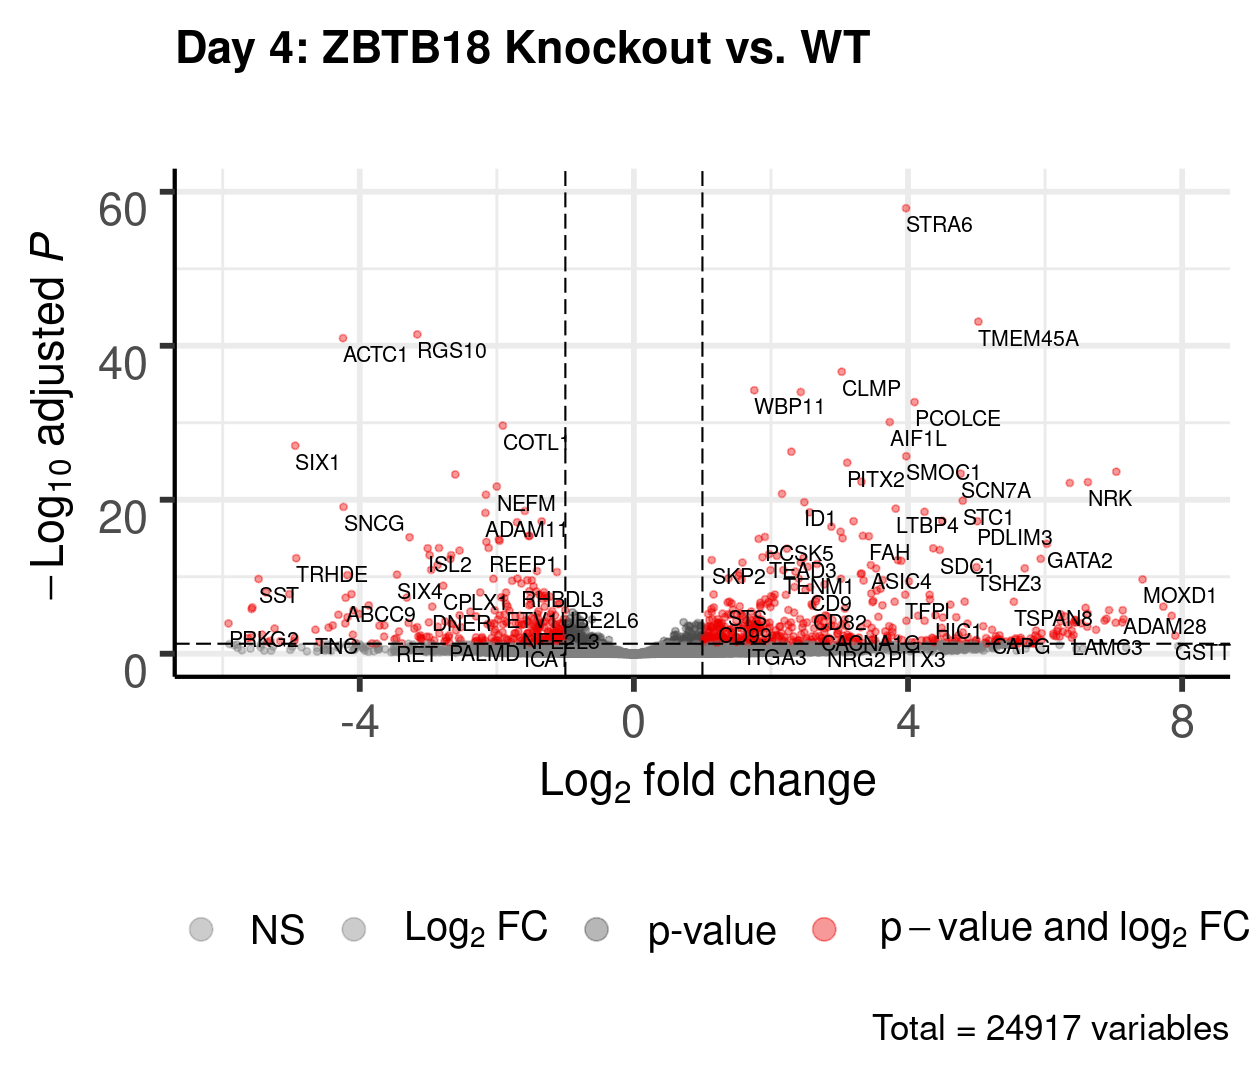

In [143]:
EnhancedVolcano(D4.vol, 
                lab = D4.vol$gene, 
                selectLab = NULL, # specify to include only a set of gene labels
                x='log2FoldChange',
                y='padj', 
                xlim=c(-6,8),
                ylim=c(0,60),
                xlab = bquote(~Log[2]~ 'fold change'), 
                ylab= bquote(~-Log[10]~adjusted~italic(P)),
                legend=c('NS', 'Log2 FC', 'Adjusted p-value'), 
                legendPosition='bottom', 
                legendLabSize = 16, 
                legendIconSize = 4.0, 
                title = "Day 4: ZBTB18 Knockout vs. WT", 
                subtitle="",
                pCutoff = fdr.D4, 
                FCcutoff = FC.D4,
                transcriptPointSize = 1, 
                transcriptLabSize = 3.0, 
                colAlpha = .4,
                col = c("grey50", "grey50", "grey30", "red2"))
ggsave("/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/neville_pdf/fig4_G_zb18ko_vs_wt_D4.pdf", 
       width = 11, height = 8, unit="in")

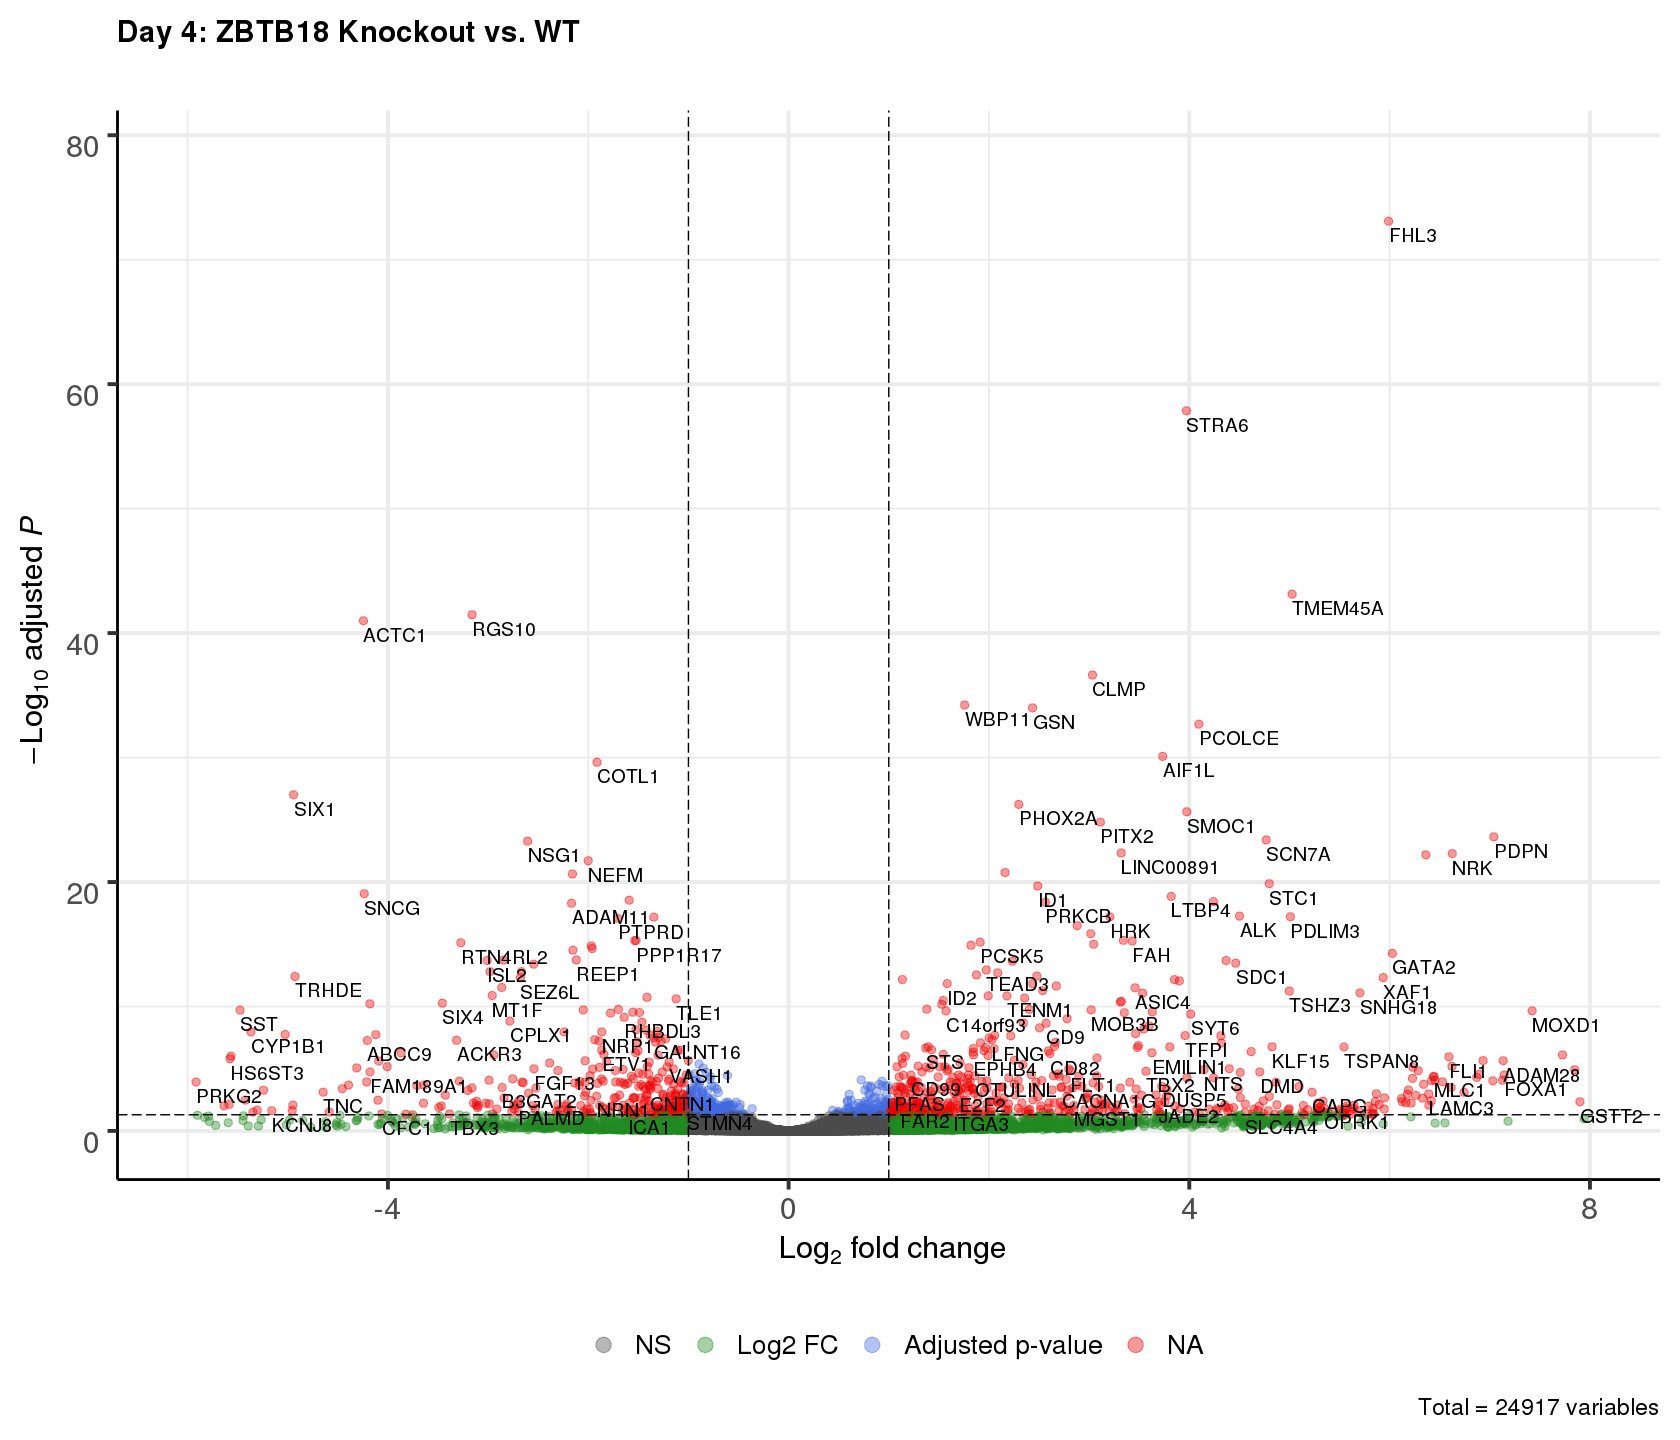

In [144]:
EnhancedVolcano(D4.vol, lab = D4.vol$gene, x='log2FoldChange',y='padj', xlim=c(-6,8),
                xlab = bquote(~Log[2]~ 'fold change'), ylab= bquote(~-Log[10]~adjusted~italic(P)),
                legend=c('NS', 'Log2 FC', 'Adjusted p-value'), legendPosition='bottom', legendLabSize = 16, 
                legendIconSize = 4.0, title = "Day 4: ZBTB18 Knockout vs. WT", subtitle="",
                pCutoff = fdr.D4, FCcutoff = FC.D4,
                transcriptPointSize = 2, transcriptLabSize = 4.0, colAlpha = .4)
# selectLab = c('FHL3', 'STRAG') to only label key transcripts
ggsave("/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/neville_pdf/fig4_G_zb18ko_vs_wt_D4.pdf", 
       width = 11, height = 8, unit="in")

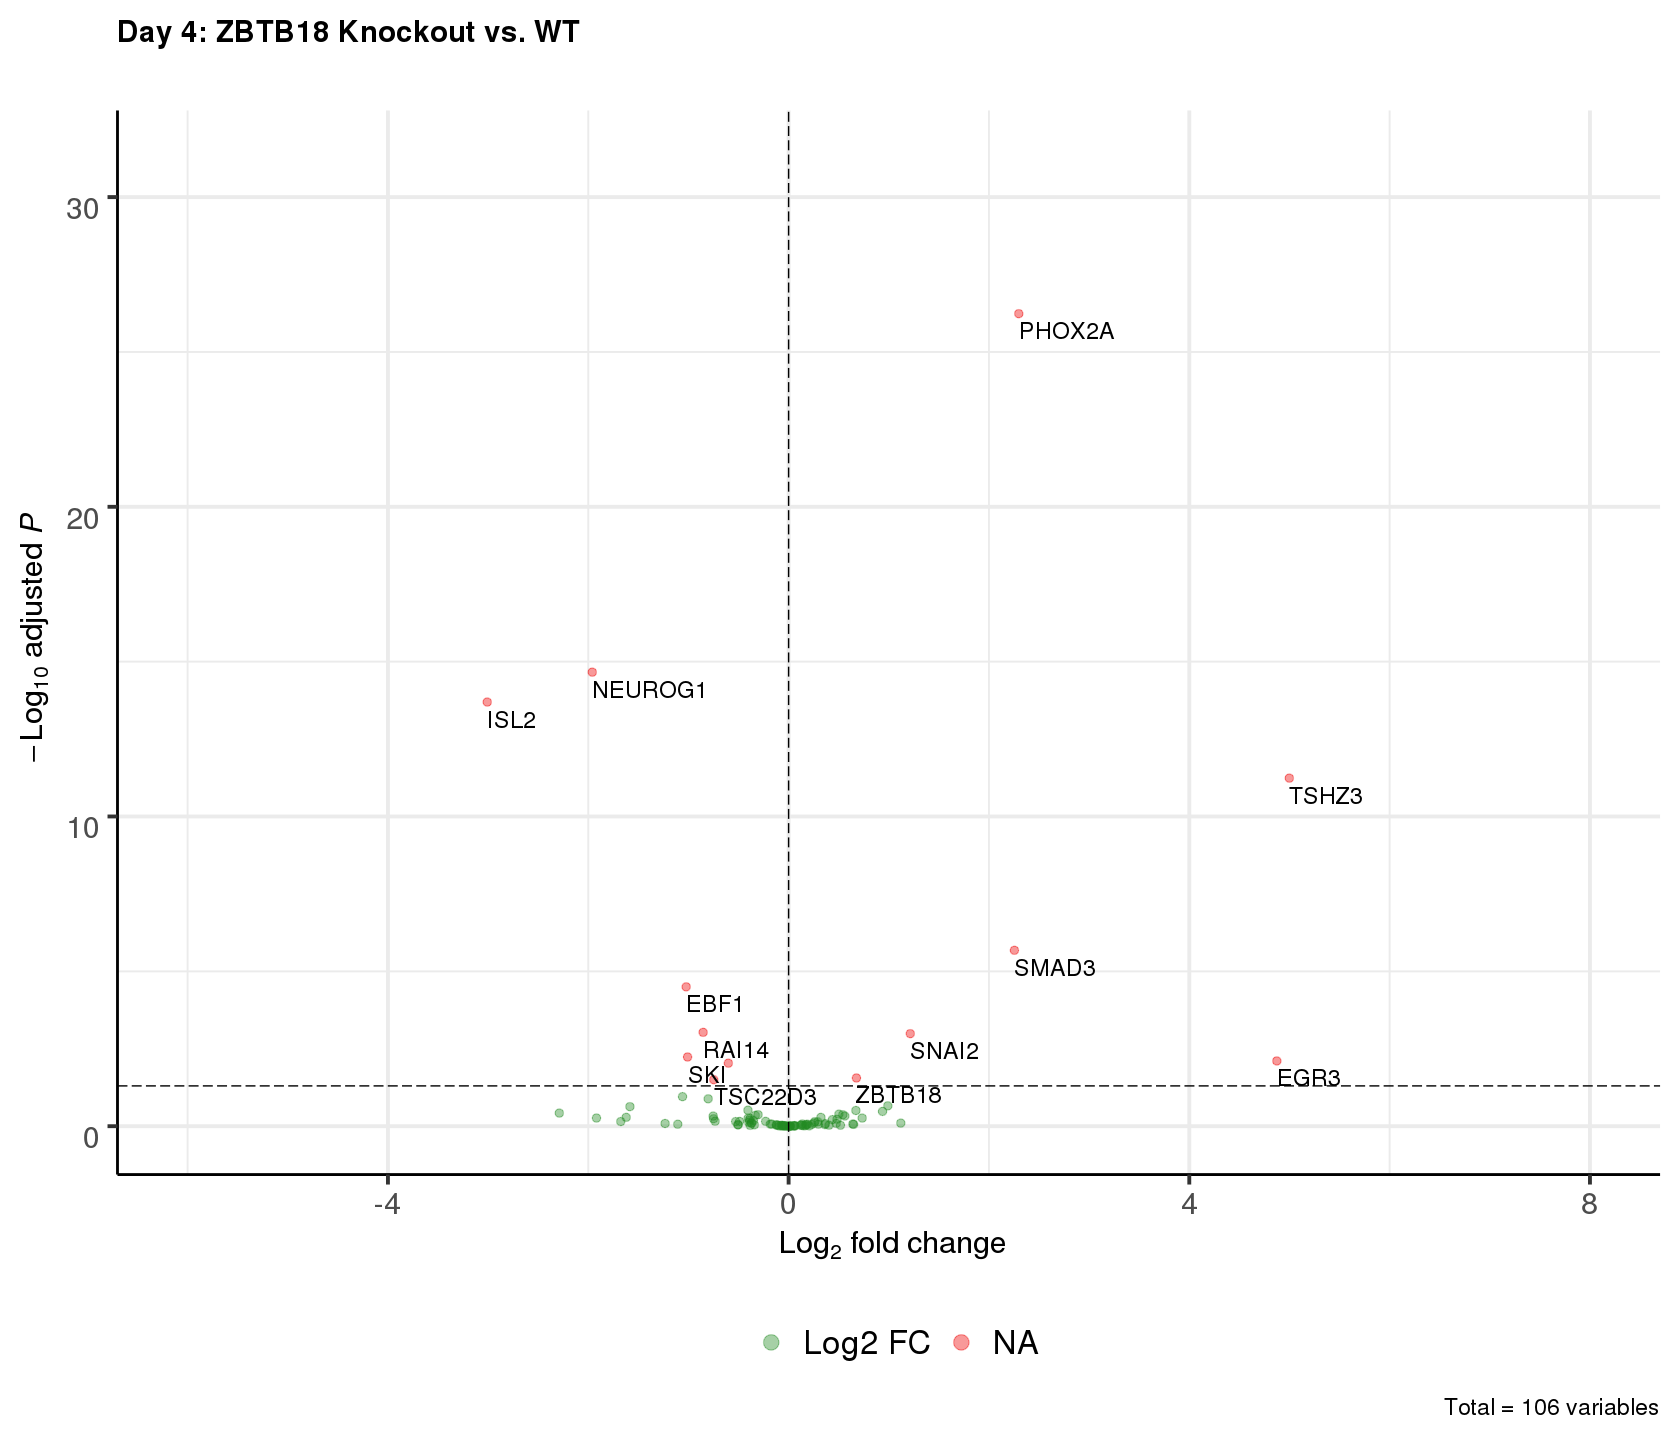

In [152]:
EnhancedVolcano(D4.vol.hits, lab = D4.vol.hits$gene, x='log2FoldChange',y='padj', xlim=c(-6,8),
                xlab = bquote(~Log[2]~ 'fold change'), ylab= bquote(~-Log[10]~adjusted~italic(P)),
                legend=c('NS', 'Log2 FC', 'Adjusted p-value'), legendPosition='bottom', legendLabSize = 20, 
                legendIconSize = 4.0, title = "Day 4: ZBTB18 Knockout vs. WT", subtitle="",
                pCutoff = fdr.D4, FCcutoff = 0,
                transcriptPointSize = 2, transcriptLabSize = 5.0, colAlpha = .4)
# selectLab = c('FHL3', 'STRAG') to only label key transcripts
ggsave("/gpfs/commons/groups/sanjana_lab/cdai/TFscreen/neville_pdf/fig4_G_zb18ko_vs_wt_D4_hitsonly.pdf", 
       width = 11, height = 8, unit="in")

# Compare significant genes sets from ES and from Day4

1. Are there overlapping genes that are significant in both dataset?

In [173]:
sigGenes.ES$gene %>% intersect(sigGenes.D4$gene)

[1] "MT1F"   "LRRC61" "EPHA1"  "LAMA4"

In [174]:
sigGenes.ES %>% filter(gene %in% c('MT1F', 'LRRC61', 'EPHA1', 'LAMA4'))
sigGenes.D4 %>% filter(gene %in% c('MT1F', 'LRRC61', 'EPHA1', 'LAMA4'))

gene_id,gene,padj,log2FoldChange,S01_B1,S01_B2,S02_B1,S02_B2,S03_B1,S03_B2,S04_B1,S04_B2,S05_B1,S05_B2,S06_B1,S06_B2,expression
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000198417.7,MT1F,1.848343e-08,-2.2681737,786.07300,411.30278,705.84783,507.64476,79.604208,144.22410,111.93358,99.249313,260.411437,75.467708,166.52735,66.051300,Down
ENSG00000127399.15,LRRC61,1.157309e-04,-7.2850781,47.23185,4.35241,31.83451,24.42277,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,Down
ENSG00000146904.9,EPHA1,2.797109e-02,-0.8895402,430.70952,551.66801,515.93854,482.34975,277.444077,460.67698,216.32108,306.412561,239.458793,224.069071,205.58933,213.612713,No Change
ENSG00000112769.19,LAMA4,1.092686e-02,5.7401719,0.00000,0.00000,0.00000,0.00000,9.365201,16.80281,11.31913,7.089237,8.979705,9.336211,14.39125,5.152938,Up


gene_id,gene,padj,log2FoldChange,S07_B1,S07_B2,S08_B1,S08_B2,S09_B1,S09_B2,S10_B1,S10_B2,S11_B1,S11_B2,S12_B1,S12_B2,expression
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ENSG00000198417.7,MT1F,1.416245e-11,-2.958475,1091.86483,315.02364,1037.24601,521.7697346,146.13763,50.64097,179.940316,49.37087,136.61055,51.729043,102.668422,52.897543,Down
ENSG00000127399.15,LRRC61,1.892402e-06,-7.112304,30.65925,26.47258,20.33816,17.2087643,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,Down
ENSG00000146904.9,EPHA1,8.756079e-03,6.391579,0.00000,0.00000,0.00000,0.0000000,0.00000,2.11004,86.141641,0.00000,34.15264,1.783760,8.555702,1.202217,Up
ENSG00000112769.19,LAMA4,1.529870e-02,5.569209,0.00000,0.00000,0.00000,0.6883506,10.25527,0.00000,3.828517,57.59935,37.56790,9.810681,0.000000,4.207759,Up


# Gene Ontology Enrichment Analysis
*not updated - 2019/9/25*

In [28]:
library(readxl)

In [29]:
D4.Dn.BioProc <- read_excel('TF_GO_Enrichment.xlsx', 'D4.Dn.BioProc')

In [30]:
colnames(D4.Dn.BioProc) <- sapply(colnames(D4.Dn.BioProc), function(x) {str_replace_all(x, ' ', '.')}) %>% as.vector

In [31]:
D4.Dn.BioProc %>% head
D4.Dn.BioProc %>% colnames

Enrichment.FDR,Genes.in.list,Total.genes,Functional.Category,Genes
<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.0001513147,4,14,Ectodermal placode development,NRP1 SIX4 SIX1 TBX3
0.0001513147,3,4,Pattern specification involved in metanephros development,IRX1 IRX2 FOXD1
0.0001850792,28,2474,Nervous system development,SYNGR3 CXCR4 NTRK3 CNTN4 ISL2 NLGN1 TNC HDAC9 NRP1 SEZ6L SIX4 HMGCS1 NRN1 SIX1 FGF13 TBX3 ASTN1 HOXB2 PENK RTN4RL1 RTN4RL2 DNER VWC2 NTNG2 FOXD1 ZNF804A PCDHB12 PCDHAC1
0.0001850792,8,178,Muscle cell development,SIX1 SIX4 TBX3 ACTC1 DNER MEGF10 HDAC9 AKAP6
0.0001850792,3,5,Trigeminal ganglion development,NRP1 SIX4 SIX1
0.0001910598,4,19,Nephron tubule formation,SIX4 SIX1 IRX1 IRX2


[1] "Enrichment.FDR"      "Genes.in.list"       "Total.genes"        
[4] "Functional.Category" "Genes"

In [476]:
categories.keep <- c('Ectodermal placode development', 'Pattern specification involved in metanephros development', 'Nervous system development', 'Synapse organization', 'Neurogenesis', 'Generation of neurons', 'Developmental growth involved in morphogenesis',
                    'Axon development', 'Cell development', 'Regulation of neuron differentiation', 'Tube morphogenesis')

In [477]:
D4.Dn.BioProc %>% head(20)

Enrichment.FDR,Genes.in.list,Total.genes,Functional.Category,Genes
<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.0001513147,4,14,Ectodermal placode development,NRP1 SIX4 SIX1 TBX3
0.0001513147,3,4,Pattern specification involved in metanephros development,IRX1 IRX2 FOXD1
0.0001850792,28,2474,Nervous system development,SYNGR3 CXCR4 NTRK3 CNTN4 ISL2 NLGN1 TNC HDAC9 NRP1 SEZ6L SIX4 HMGCS1 NRN1 SIX1 FGF13 TBX3 ASTN1 HOXB2 PENK RTN4RL1 RTN4RL2 DNER VWC2 NTNG2 FOXD1 ZNF804A PCDHB12 PCDHAC1
0.0001850792,8,178,Muscle cell development,SIX1 SIX4 TBX3 ACTC1 DNER MEGF10 HDAC9 AKAP6
0.0001850792,3,5,Trigeminal ganglion development,NRP1 SIX4 SIX1
0.0001910598,4,19,Nephron tubule formation,SIX4 SIX1 IRX1 IRX2
0.0002148396,3,6,Cranial ganglion development,NRP1 SIX4 SIX1
0.0002890158,11,434,Synapse organization,NLGN1 TNC NRP1 SEZ6L SIX4 SIX1 NTRK3 ZNF804A SNCG NTNG2 DNER
0.0005390154,21,1683,Neurogenesis,CXCR4 NTRK3 CNTN4 ISL2 NLGN1 TNC HDAC9 NRP1 SIX4 NRN1 SIX1 ASTN1 PENK RTN4RL1 RTN4RL2 DNER VWC2 NTNG2 FOXD1 ZNF804A FGF13


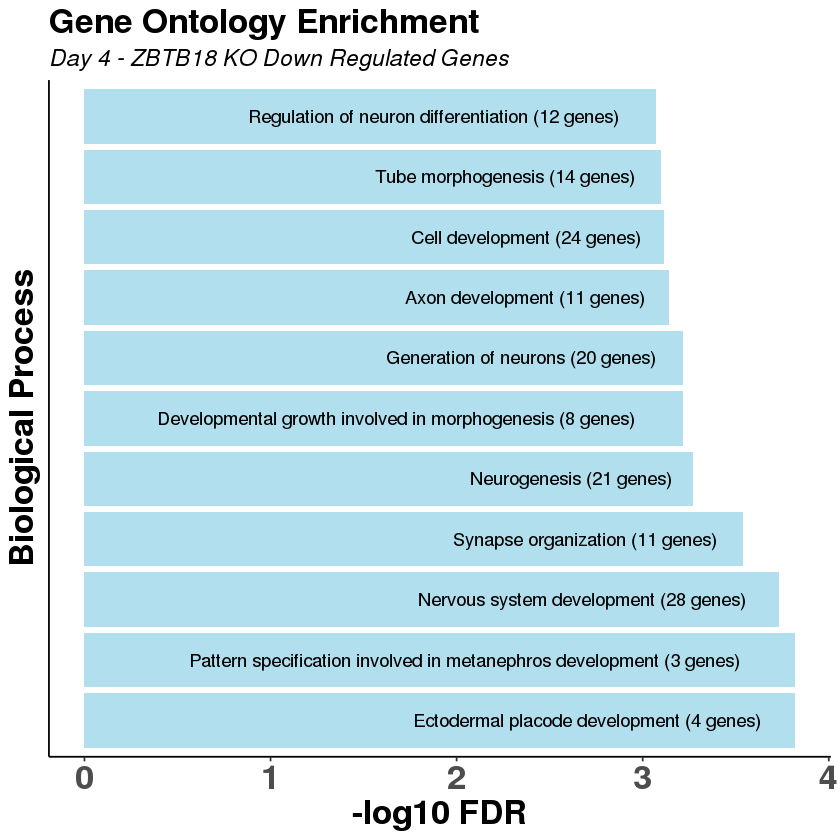

In [492]:
D4.Dn.BioProc %>% filter(Functional.Category %in% categories.keep) %>%
    ggplot(aes(x=reorder(Functional.Category, Enrichment.FDR), y=-log10(Enrichment.FDR))) + theme_classic() + geom_bar(stat='identity', fill='lightblue2') + coord_flip() +
            geom_text(aes(label=paste0(Functional.Category, ' (', Genes.in.list, ' genes)')), hjust=1.1) + 
            labs(title="Gene Ontology Enrichment", x="Biological Process", y="-log10 FDR", subtitle='Day 4 - ZBTB18 KO Down Regulated Genes') +
            theme(axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.text.x = element_text(size=20, face = 'bold'),
                  axis.title.x = element_text(size=20, face='bold'), axis.title.y = element_text(size=20, face='bold'), 
                  plot.title = element_text(size=20, face='bold'), plot.subtitle = element_text(size=14, face='italic')) 
            

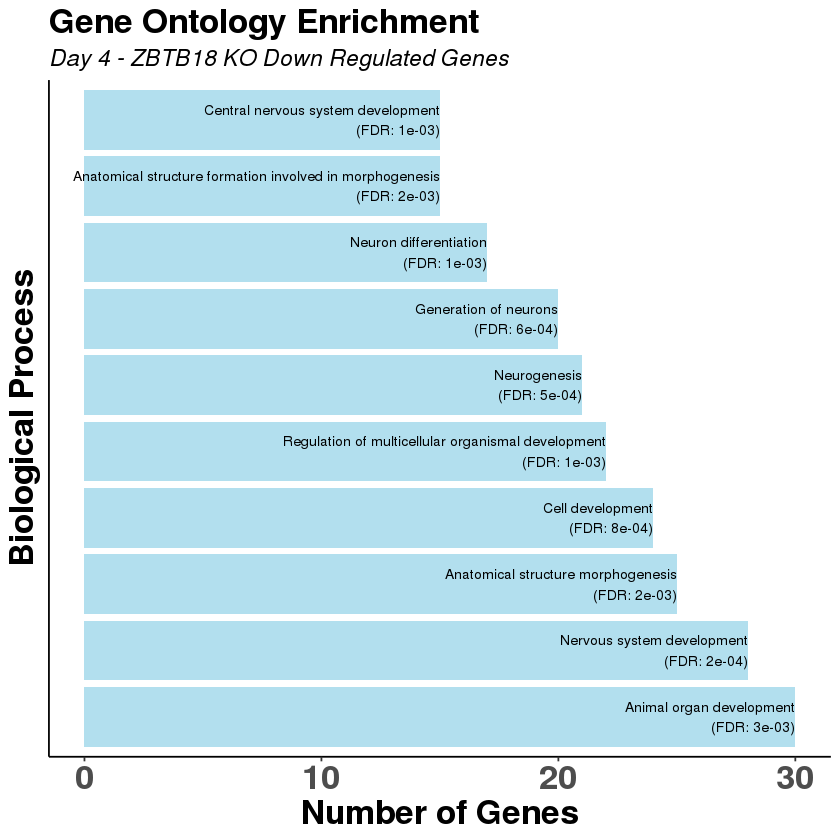

In [523]:
D4.Dn.BioProc %>% top_n(10, Genes.in.list) %>%
    ggplot(aes(x=reorder(Functional.Category, -Genes.in.list), y=Genes.in.list)) + theme_classic() + geom_bar(stat='identity', fill='lightblue2') + coord_flip() +
            geom_text(aes(label=paste0(Functional.Category, "\n(FDR: ", formatC(Enrichment.FDR, format = 'e', digits=0), ')')), hjust=1, size=3) + 
            labs(title="Gene Ontology Enrichment", x="Biological Process", y="Number of Genes", subtitle='Day 4 - ZBTB18 KO Down Regulated Genes') +
            theme(axis.text.y = element_blank(), axis.ticks.y = element_blank(), axis.text.x = element_text(size=20, face = 'bold'),
                  axis.title.x = element_text(size=20, face='bold'), axis.title.y = element_text(size=20, face='bold'), 
                  plot.title = element_text(size=20, face='bold'), plot.subtitle = element_text(size=14, face='italic')) 
            

## ES

## Day 4

# Other

In [955]:
data.frame(tf.heatmap.genes.3e) %>% cbind.fill(tf.heatmap.genes.3d)

ERROR: Error in cbind.fill(., tf.heatmap.genes.3d): could not find function "cbind.fill"


In [116]:
?EnhancedVolcano

EnhancedVolcano {EnhancedVolcano},R Documentation
toptable,"A data-frame of test statistics (if not, a data frame, an attempt will be made to convert it to one). Requires at least the following: column for transcript names (can be rownames); a column for log2 fold changes; a column for nominal or adjusted p-value. REQUIRED."
lab,A column name in toptable containing transcript names. Can be rownames(toptable). REQUIRED.
x,A column name in toptable containing log2 fold changes. REQUIRED.
y,A column name in toptable containing nominal or adjusted p-values. REQUIRED.
selectLab,A vector containing a subset of lab. DEFAULT = NULL. OPTIONAL.
xlim,"Limits of the x-axis. DEFAULT = c(min(toptable[,x], na.rm=TRUE), max(toptable[,x], na.rm=TRUE)). OPTIONAL."
ylim,"Limits of the y-axis. DEFAULT = c(0, max(-log10(toptable[,y]), na.rm=TRUE) + 5). OPTIONAL."
xlab,"Label for x-axis. DEFAULT = bquote(~Log[2]~ ""fold change""). OPTIONAL."
ylab,Label for y-axis. DEFAULT = bquote(~-Log[10]~italic(P)). OPTIONAL.
axisLabSize,Size of x- and y-axis labels. DEFAULT = 18. OPTIONAL.
